<a href="https://colab.research.google.com/github/cyberanalyst268/Data-Science-and-Decision-Making/blob/main/Agrotech-project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import datetime as dt
import scipy.stats as st
import matplotlib.pyplot as plt


from pandas import read_csv
from matplotlib import pyplot
from econml.dr import DRLearner
from pandas import DataFrame
from pandas import Grouper
from matplotlib import pyplot
from sklearn import linear_model
from econml.metalearners import XLearner
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model





In [ ]:
# Load Agrotech data from the same directory( for simplicity ofcourse.)
data = pd.read_excel(r'Data.xlsx',parse_dates=True,sheet_name=None)


In [ ]:
data.keys()

dict_keys(['plants', 'flight dates', 'planting', 'weather'])

In [ ]:
plants = data['plants'].rename(columns={"Batch Number": "batch_number", "Plant Date": "plant_date","Class":"class","Fresh Weight (g)": "fresh_weight(g)","Head Weight (g)": "head_weight(g)","Radial Diameter (mm)": "radial_diameter(mm)","Polar Diameter (mm)": "polar_diameter(mm)","Diameter Ratio": "diameter_ratio","Leaves":"leaves","Density (kg/L)": "density(kg/L)","Leaf Area (cm^2)": "leaf_area(cm^2)","Square ID": "square_id","Check Date": "check_date","Flight Date": "flight_date","Remove":"remove"},errors="raise")
#plants = plants.fillna(1)
plants.head()

,batch_number,plant_date,class,fresh_weight(g),head_weight(g),radial_diameter(mm),polar_diameter(mm),diameter_ratio,leaves,density(kg/L),leaf_area(cm^2),square_id,check_date,flight_date,remove
0,402,2020-04-11,3,15.0,NaN,NaN,NaN,NaN,10.0,NaN,185.0,208,2020-04-30,NaT,NaN
1,402,2020-04-11,4,15.0,NaN,NaN,NaN,NaN,11.0,NaN,156.0,208,2020-04-30,NaT,NaN
2,402,2020-04-11,1,16.0,NaN,NaN,NaN,NaN,12.0,NaN,137.0,208,2020-04-30,NaT,NaN
3,402,2020-04-11,3,15.0,NaN,NaN,NaN,NaN,10.0,NaN,225.0,208,2020-04-30,NaT,NaN
4,402,2020-04-11,3,15.0,NaN,NaN,NaN,NaN,11.0,NaN,157.0,208,2020-04-30,NaT,NaN


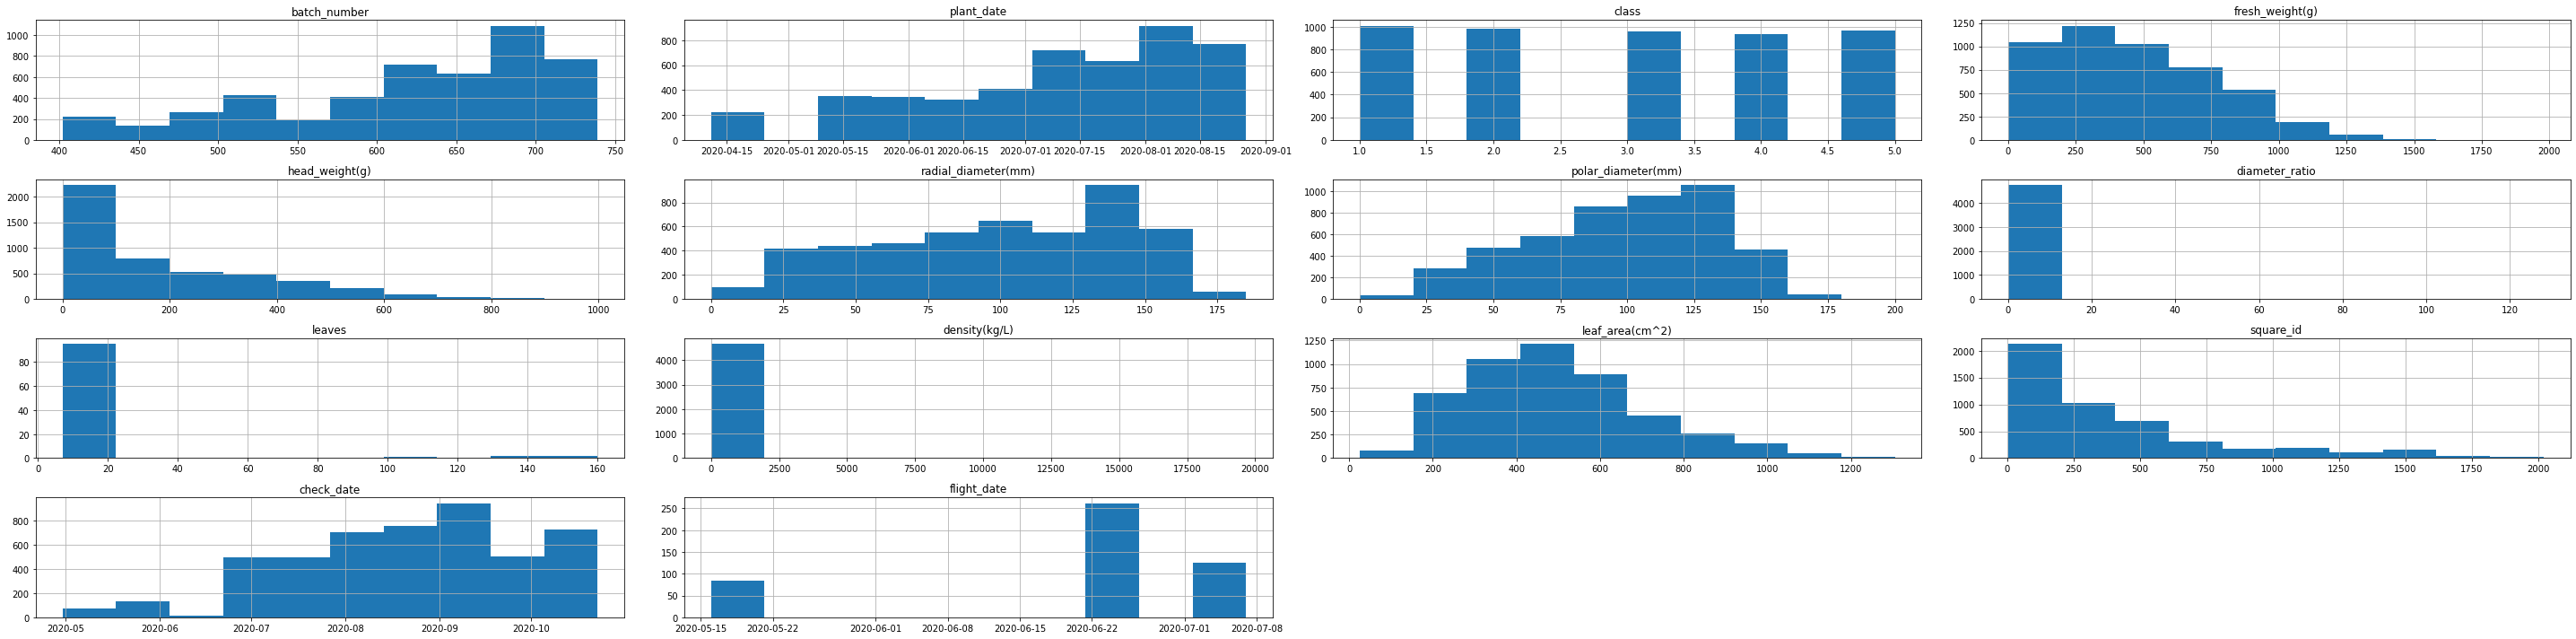

In [ ]:
plants.hist(figsize=(40,10))
plt.tight_layout()
plt.show()

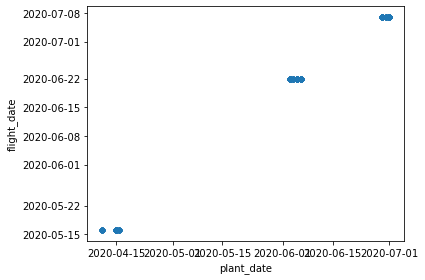

In [ ]:
plants.plot.scatter('plant_date','flight_date')
plt.tight_layout()
plt.show()

In [ ]:
flight_dates = data['flight dates'].rename(columns={"Batch Number":"batch_number","Flight Date":"flight_date"},errors="raise")
flight_dates.head()                      

,batch_number,flight_date
0,402,2020-04-30
1,408,2020-04-30
2,409,2020-04-30
3,466,2020-07-01
4,467,2020-07-01


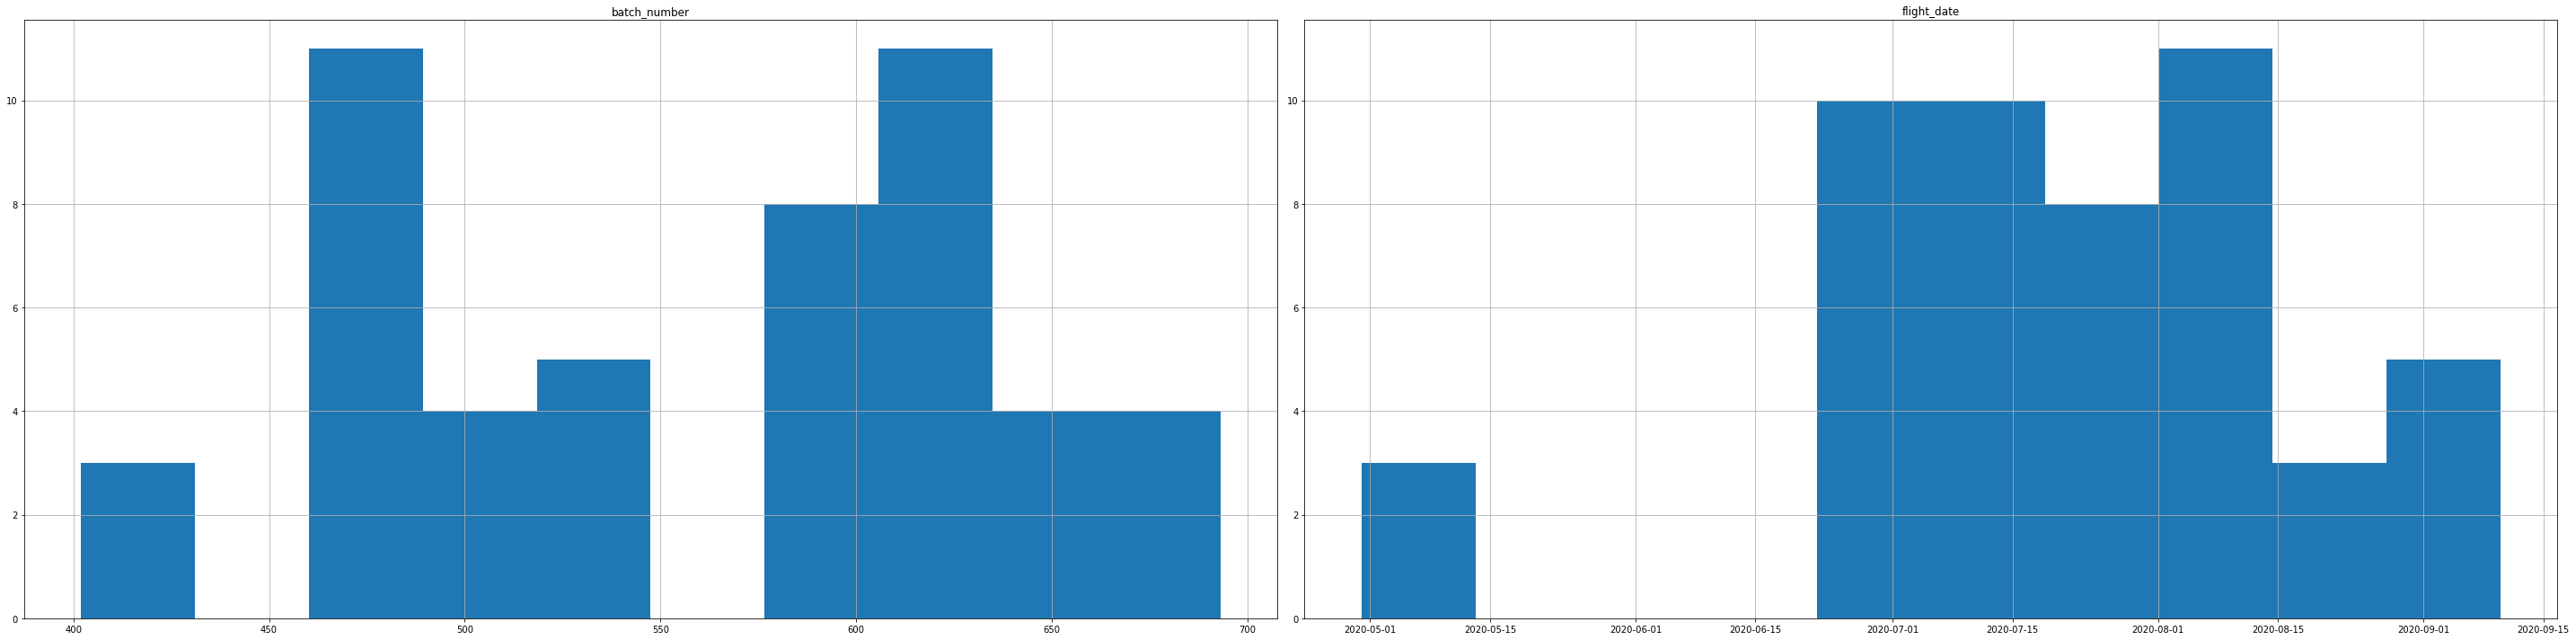

In [ ]:
flight_dates.hist(figsize=(40,10))
plt.tight_layout()
plt.show()

In [ ]:
planting = data['planting'].rename(columns={"Crop":"crop","Column2":"column2","Column3":"column3","Plant_Date":"plant_date","Column1":"column1","Region":"region","Column4":"column4","Planting_Batch":"planting_batch","Volume_Planted":"volume_planted","Planting_Wk":"planting_wk"},errors="raise")
#planting = planting.fillna(1) 
planting.head()

,crop,column2,column3,plant_date,column1,region,column4,planting_batch,volume_planted,planting_wk
0,3,NaN,NaN,2020-02-06 00:00:00,NaN,0.0,NaN,392,198912.0,6.0
1,3,NaN,NaN,2020-02-07 00:00:00,NaN,0.0,NaN,503,63840.0,6.0
2,3,NaN,NaN,2020-02-07 00:00:00,NaN,0.0,NaN,614,179928.0,6.0
3,3,NaN,NaN,2020-02-08 00:00:00,NaN,0.0,NaN,725,200256.0,6.0
4,3,NaN,NaN,2020-02-10 00:00:00,NaN,0.0,NaN,770,13944.0,7.0


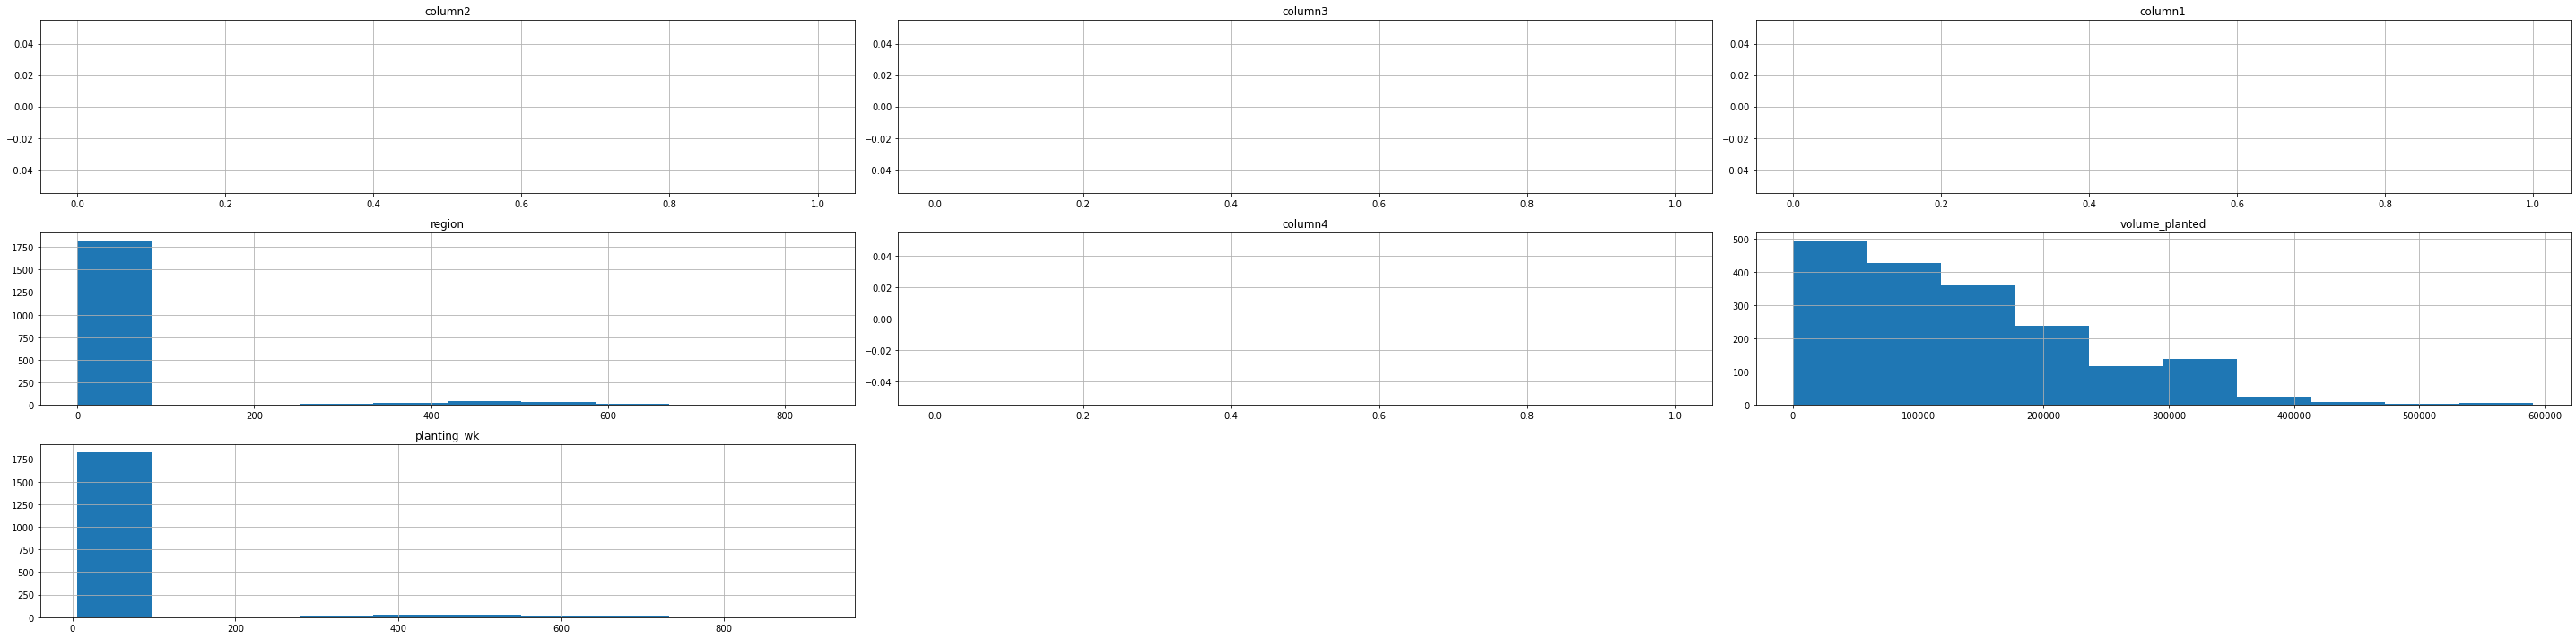

In [ ]:
planting.hist(figsize=(40,10))
plt.tight_layout()
plt.show()

In [ ]:
weather = data['weather'].rename(columns={"Unnamed: 0":"unnamed:0","Solar Radiation [avg]":"solar_radiation[avg]","Precipitation [sum]":"precipitation[sum]","Wind Speed [avg]":"wind_speed[avg]","Wind Speed [max]":"wind_speed[max]","Battery Voltage [last]":"battery_voltage[last]","Leaf Wetness [time]":"leaf_wetness[time]","Air Temperature [avg]":"air_temperature[avg]","Air Temperature [max]":"air_temperature[max]","Air Temperature [min]":"air_temperature[min]","Relative Humidity [avg]":"relative_humidity[avg]","Dew Point [avg]":"dew_point[avg]","Dew Point [min]":"dew_point[min]","ET0 [result]":"eto[result]"},errors="raise")
#weather = weather.fillna(1)
weather.head()

,unnamed:0,solar_radiation[avg],precipitation[sum],wind_speed[avg],wind_speed[max],battery_voltage[last],leaf_wetness[time],air_temperature[avg],air_temperature[max],air_temperature[min],relative_humidity[avg],dew_point[avg],dew_point[min],eto[result]
0,2014-05-14,159,0.0,1.4,3.3,6834,70,14.27,18.90,7.19,64.95,7.0,5.6,NaN
1,2014-05-15,280,0.0,0.6,2.3,6894,500,13.51,22.06,3.04,72.91,7.6,3.0,3.6
2,2014-05-16,186,3.4,0.8,2.7,6874,375,15.65,24.24,7.23,74.69,10.5,6.5,2.9
3,2014-05-17,221,0.0,1.0,3.3,6874,565,17.46,25.70,9.93,71.42,11.5,8.1,3.6
4,2014-05-18,255,0.0,2.1,5.5,6854,625,16.85,24.62,8.45,74.45,11.4,8.3,4.2


In [ ]:
#Convert weather data into features.
weather_index = weather.keys()
plants_index = plants.keys()
weather_index,plants_index


(Index(['unnamed:0', 'solar_radiation[avg]', 'precipitation[sum]',
        'wind_speed[avg]', 'wind_speed[max]', 'battery_voltage[last]',
        'leaf_wetness[time]', 'air_temperature[avg]', 'air_temperature[max]',
        'air_temperature[min]', 'relative_humidity[avg]', 'dew_point[avg]',
        'dew_point[min]', 'eto[result]'],
       dtype='object'),
 Index(['batch_number', 'plant_date', 'class', 'fresh_weight(g)',
        'head_weight(g)', 'radial_diameter(mm)', 'polar_diameter(mm)',
        'diameter_ratio', 'leaves', 'density(kg/L)', 'leaf_area(cm^2)',
        'square_id', 'check_date', 'flight_date', 'remove'],
       dtype='object'))

In [ ]:
pX = plants['plant_date'] = pd.to_datetime(plants['plant_date'])
pX = plants['plant_date']=plants['plant_date'].map(dt.datetime.toordinal)
fy = plants['flight_date'] = pd.to_datetime(plants['flight_date'])
fy = plants['flight_date']=plants['flight_date'].map(dt.datetime.toordinal)



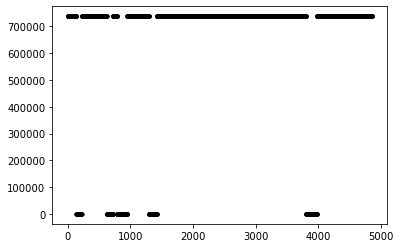

<Figure size 864x576 with 0 Axes>

In [ ]:
# Figure out how to use date-time features. Most regressors need numerical variables, so you’ll
#need to convert these to some other format. For example, you can create a variable called
#days_to_check that converts flight_date into number of days from plant_date.
days_to_check = pX - fy
days_to_check.plot(style='k.')
plt.figure(figsize=(12,8))
plt.show()

In [ ]:
# Merge Plants and Weather Datasets
frames =[plants,weather]
p_w = pd.concat(frames)
p_w['check_date'].head(),p_w['plant_date'].head()

(0   2020-04-30
 1   2020-04-30
 2   2020-04-30
 3   2020-04-30
 4   2020-04-30
 Name: check_date, dtype: datetime64[ns],
 0    737526.0
 1    737526.0
 2    737526.0
 3    737526.0
 4    737526.0
 Name: plant_date, dtype: float64)

In [ ]:
# Plants and Weather Datasets
p_w

,batch_number,plant_date,class,fresh_weight(g),head_weight(g),radial_diameter(mm),polar_diameter(mm),diameter_ratio,leaves,density(kg/L),...,wind_speed[max],battery_voltage[last],leaf_wetness[time],air_temperature[avg],air_temperature[max],air_temperature[min],relative_humidity[avg],dew_point[avg],dew_point[min],eto[result]
0,402.0,737526.0,3.0,15.0,NaN,NaN,NaN,NaN,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,402.0,737526.0,4.0,15.0,NaN,NaN,NaN,NaN,11.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,402.0,737526.0,1.0,16.0,NaN,NaN,NaN,NaN,12.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,402.0,737526.0,3.0,15.0,NaN,NaN,NaN,NaN,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,402.0,737526.0,3.0,15.0,NaN,NaN,NaN,NaN,11.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2551,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.5,7166.0,0.0,10.51,14.53,8.95,99.86,10.3,8.8,NaN
2552,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.5,6864.0,0.0,10.80,14.53,8.38,99.86,10.6,8.2,NaN
2553,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,6854.0,0.0,10.29,17.14,3.15,92.94,8.8,3.0,3.4
2554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.5,6864.0,0.0,11.39,16.61,7.50,90.32,9.4,5.2,3.0


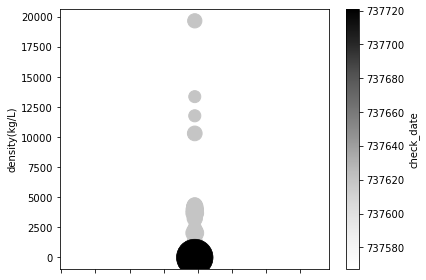

In [ ]:
#Predict the size of future Lettuce
p_w.plot.scatter('plant_date','density(kg/L)','leaf_area(cm^2)','check_date')
plt.tight_layout()
plt.show()

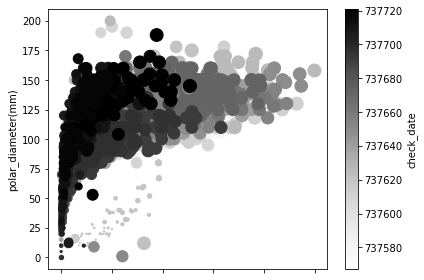

In [ ]:
#simultaneously predict head weight, polar diameter, and radial diameter at the ‘Check Date’ using information about the plant at flight time and about the weather.
p_w.plot.scatter('head_weight(g)','polar_diameter(mm)','radial_diameter(mm)','check_date')
plt.tight_layout()
plt.show()

In [ ]:
p_w['plant_date'] = pd.to_datetime(p_w['plant_date'])
p_w['plant_date'] = p_w['plant_date'].map(dt.datetime.toordinal)
p_w['check_date'] = pd.to_datetime(p_w['check_date'])
p_w['check_date'] = p_w['check_date'].map(dt.datetime.toordinal)
p_w['flight_date'] = pd.to_datetime(p_w['flight_date'])
p_w['flight_date'] = p_w['flight_date'].map(dt.datetime.toordinal)
X = p_w['check_date'] - p_w['plant_date']
y = pd.to_datetime(p_w['flight_date'])
X = pd.to_datetime(X)


<function matplotlib.pyplot.show(close=None, block=None)>

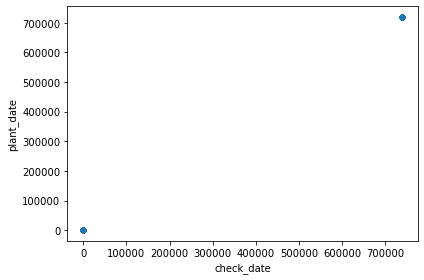

In [ ]:
p_w.plot.scatter('check_date','plant_date')
plt.tight_layout()
plt.show

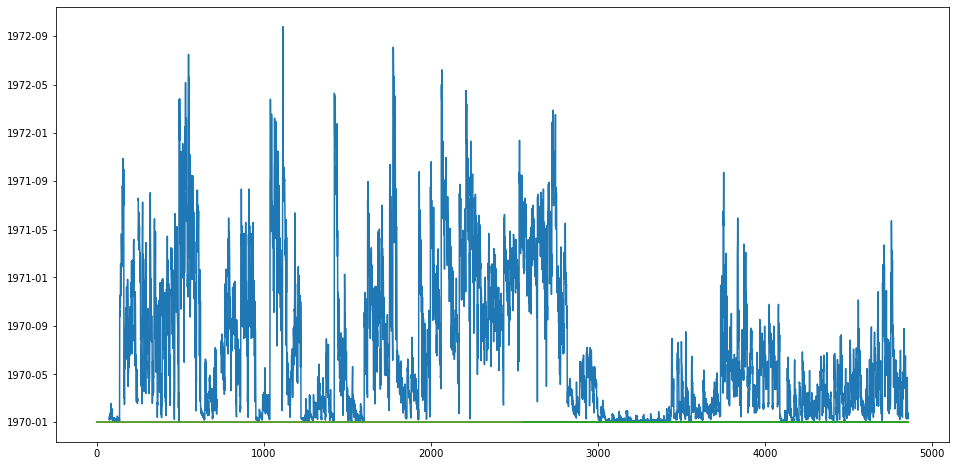

In [ ]:
p_w['head_weight(g)'].plot(figsize=(16,8)),X.plot(figsize=(16,8)),y.plot(figsize=(16,8))
plt.show()

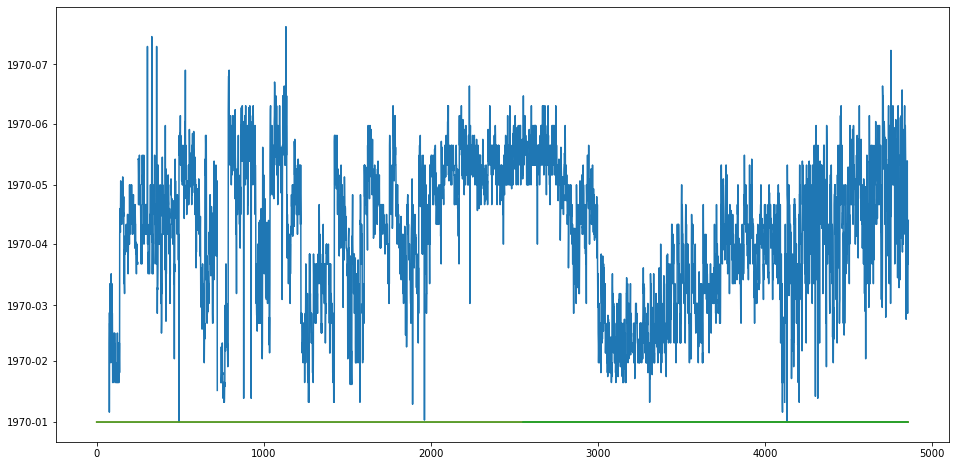

In [ ]:
p_w['polar_diameter(mm)'].plot(figsize=(16,8)),X.plot(figsize=(16,8)),y.plot(figsize=(16,8))
plt.show()

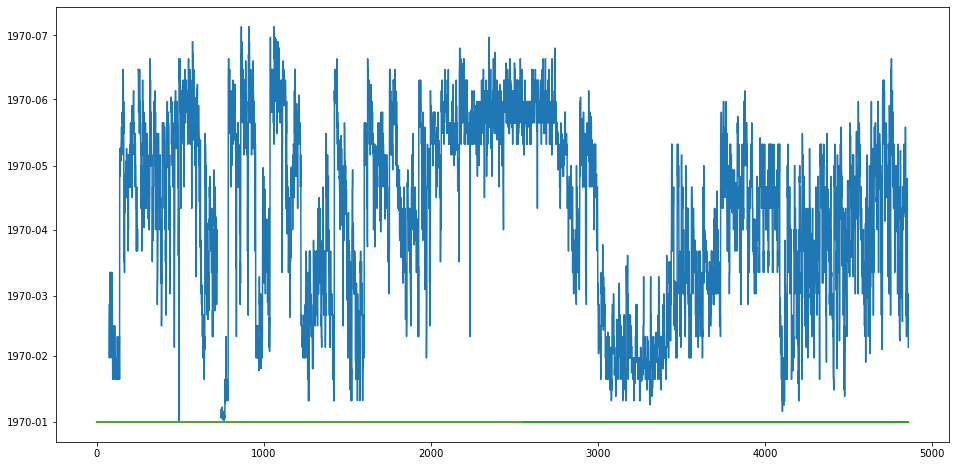

In [ ]:
p_w['radial_diameter(mm)'].plot(figsize=(16,8)),X.plot(figsize=(16,8)),y.plot(figsize=(16,8))
plt.show()